Задание

Цель: применить на практике базовые ансамблевые методы
Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
2. Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier
b) ensemble.RandomForestClassifier
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5
8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
a) Повторите п. 5
9. Сформулируйте выводы по проделанной работе.
a) Сравните метрики построенных моделей.
b) Напишите свое мнение, какая модель наилучшая и почему.
10. Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.
Результат: получены знания по использованию базовых ансамблевых методов.

In [98]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [99]:
df = pd.read_csv('Data/heart.csv')

In [100]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [102]:
# категориальные переменные переведем в числовые
X = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'Oldpeak', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int)
# столбец HeartDisease является целевой переменной, удаляем его из Х
del X['HeartDisease']
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,Oldpeak_5.6,Oldpeak_6.2,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [103]:
y = df['HeartDisease']

In [104]:
f = df.loc[df['HeartDisease'] == 1]
f.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


In [105]:
f1 = df.loc[df['HeartDisease'] == 0]
f1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [106]:
a = f['Cholesterol'].groupby(f['Age']).mean()
a = a.reset_index()
a

,Age,Cholesterol
0,31,270.000000
1,32,264.500000
2,33,246.000000
3,34,78.000000
4,35,184.250000
5,36,133.500000
6,37,207.000000
7,38,118.636364
8,39,249.500000
9,40,208.000000


In [107]:
b = f1['Cholesterol'].groupby(f1['Age']).mean()
b = b.reset_index()
b

,Age,Cholesterol
0,28,132.000000
1,29,236.666667
2,30,237.000000
3,31,219.000000
4,32,225.666667
5,33,298.000000
6,34,197.400000
7,35,205.000000
8,36,218.750000
9,37,236.400000


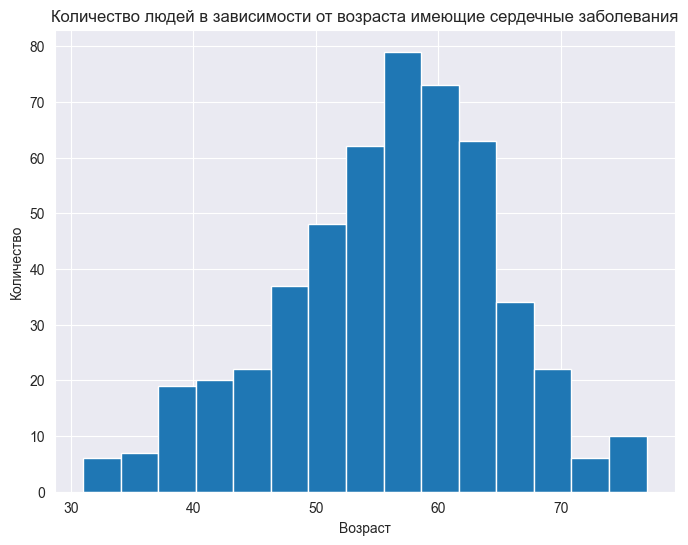

In [108]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(f['Age'], bins=15, density=False)
ax.set_ylabel("Количество")
ax.set_xlabel("Возраст")
ax.set_title("Количество людей в зависимости от возраста имеющие сердечные заболевания");

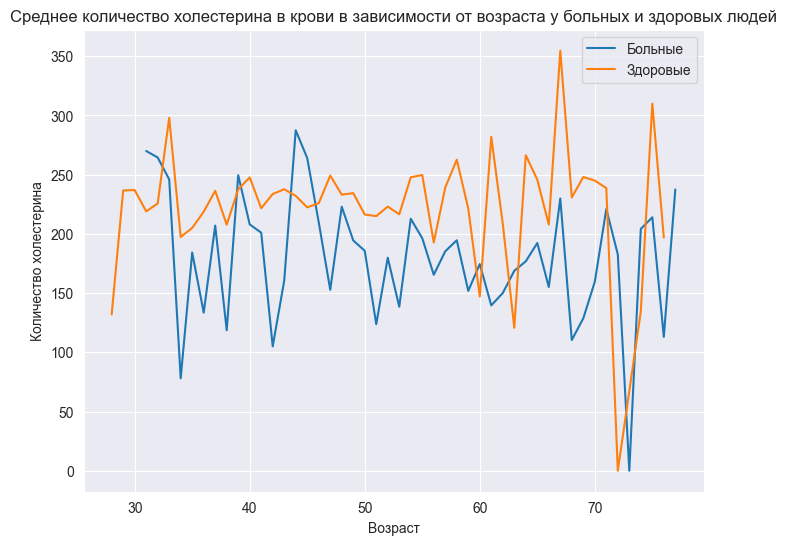

In [109]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(a['Age'], a['Cholesterol'], label='Больные')
ax.plot(b['Age'], b['Cholesterol'], label='Здоровые')
ax.set_ylabel("Количество холестерина")
ax.set_xlabel("Возраст")
ax.set_title("Среднее количество холестерина в крови в зависимости от возраста у больных и здоровых людей");
ax.legend()


Из графика замечаем, что у исследуемых людей в возрасте 72-73 лет нет данных о холестерине, чего не может быть, соответственно проверяем и заполним пропуски среднем значением возрастной группы человека. 

In [110]:
X.loc[X['Cholesterol'] == 0]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,Oldpeak_5.6,Oldpeak_6.2,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
293,65,115,0,0,93,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
294,32,95,0,1,127,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
295,61,105,0,1,110,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
296,50,145,0,1,139,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
297,57,110,0,1,131,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,122,0,0,120,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
515,63,130,0,1,160,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
518,48,102,0,1,110,0,1,0,0,1,...,0,0,0,0,1,0,1,1,0,0
535,56,130,0,0,122,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
for i, h in enumerate(df.values):
    if h[4] == 0:
        if h[0] < 30:
            X['Cholesterol'][i] = X['Cholesterol'].groupby(X['Age'].where(X['Age'] < 30)).mean()
        elif 30 <= h['Age'] < 40:
            X['Cholesterol'][i] = X['Cholesterol'].groupby(X['Age'].where(30 <= X['Age'] < 40)).mean()
        elif 40 <= h['Age'] < 50:
            X['Cholesterol'][i] = X['Cholesterol'].groupby(X['Age'].where(40 <= X['Age'] < 50)).mean()
        elif 50 <= h['Age'] < 60:
            X['Cholesterol'][i] = X['Cholesterol'].groupby(X['Age'].where(50 <= X['Age'] < 60)).mean()
        elif 60 <= h['Age'] < 70:    
            X['Cholesterol'][i] = X['Cholesterol'].groupby(X['Age'].where(60 <= X['Age'] < 70)).mean()
        else:
            X['Cholesterol'][i] = X['Cholesterol'].groupby(X['Age'].where(X['Age'] >= 70)).mean()

In [ ]:
X.info()